# Sentiment analysis using pre-trained language models

## Download Hugging face lib

https://huggingface.co/docs/transformers/v4.15.0/installation

In [1]:
!pip install transformers
!pip install torch
!pip install chardet
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.2/387.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (s

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from transformers import pipeline
from tqdm.notebook import tqdm
classifier = pipeline("sentiment-analysis")
#classifier("I am impressed how long this ink last and how fast the seller sent it to me. Not a hitch at all, fantastic.")

#using default pre trained model
# distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
#Using a pipeline without specifying a model name and revision in production is not recommended.
df = pd.read_csv('../content/bone_conduct_headphone.csv')
df

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,reviewer,rating,title,date,review
0,Melissa,5,Great headphones,2023年10月16日在美國評論,"The fit is great, they don’t move at all durin..."
1,Jacob Joyner,5,Nice,2023年10月15日在美國評論,Good product that fits nicely and is surprisin...
2,VP ED Selector,5,Best headphones compared to in the ear styles,2023年10月15日在美國評論,"Excellent sounded and very user friendly, work..."
3,JP,4,nice headphones,2023年10月14日在美國評論,nice headphones. would be better if they were ...
4,Ollie,5,Love them so far,2023年10月13日在美國評論,I LOVE these headphones. I struggle finding he...
...,...,...,...,...,...
95,justin landis,3,Ok for quiet spaces,2023年9月28日在美國評論,"I bought these to use on bicycle rides, howeve..."
96,Rich,5,Perfect for fitness,2023年9月28日在美國評論,Perfect for my workouts! I wasn’t able to be a...
97,Connie Hayes,5,Love these bone conduction headphones!,2023年9月28日在美國評論,I love how easy they are to use!
98,Pedro Cortez,4,Decent but could be better,2023年9月28日在美國評論,Bought these for ASMR and Binaural frequency l...


## **Using default model**

In [4]:
#default model

#df['rating'][0][0] star rating but in string
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['title']
        if not pd.isnull(row['review']):
            review_text = str(row['review'])
            text += '.' + review_text
        res[i] = classifier(text)[0]

    except Exception as e:
        print(f'Broke for row {i}, error: {e}')

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for row 58, error: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).


In [5]:
#res
#df
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#vaders
#vaders = vaders.merge(df, how='left')
merged_df = df.merge(vaders, left_index=True, right_on='Id', how='left')
output_file = '../content/merged_default_bone.csv'

# Export the merged DataFrame as a CSV file
merged_df.to_csv(output_file, index=False)
merged_df

,reviewer,rating,title,date,review,Id,label,score
0.0,Melissa,5,Great headphones,2023年10月16日在美國評論,"The fit is great, they don’t move at all durin...",0,POSITIVE,0.999249
1.0,Jacob Joyner,5,Nice,2023年10月15日在美國評論,Good product that fits nicely and is surprisin...,1,POSITIVE,0.979142
2.0,VP ED Selector,5,Best headphones compared to in the ear styles,2023年10月15日在美國評論,"Excellent sounded and very user friendly, work...",2,POSITIVE,0.999629
3.0,JP,4,nice headphones,2023年10月14日在美國評論,nice headphones. would be better if they were ...,3,POSITIVE,0.986674
4.0,Ollie,5,Love them so far,2023年10月13日在美國評論,I LOVE these headphones. I struggle finding he...,4,NEGATIVE,0.989921
...,...,...,...,...,...,...,...,...
94.0,justin landis,3,Ok for quiet spaces,2023年9月28日在美國評論,"I bought these to use on bicycle rides, howeve...",95,NEGATIVE,0.935111
95.0,Rich,5,Perfect for fitness,2023年9月28日在美國評論,Perfect for my workouts! I wasn’t able to be a...,96,POSITIVE,0.999292
96.0,Connie Hayes,5,Love these bone conduction headphones!,2023年9月28日在美國評論,I love how easy they are to use!,97,POSITIVE,0.999678
97.0,Pedro Cortez,4,Decent but could be better,2023年9月28日在美國評論,Bought these for ASMR and Binaural frequency l...,98,POSITIVE,0.990336


# **Get the graph**
### from the result limitation:
### 1. fault pos/neg
### 2. no neutral analysis
### 3. word limitation
### 4. no recommand key word

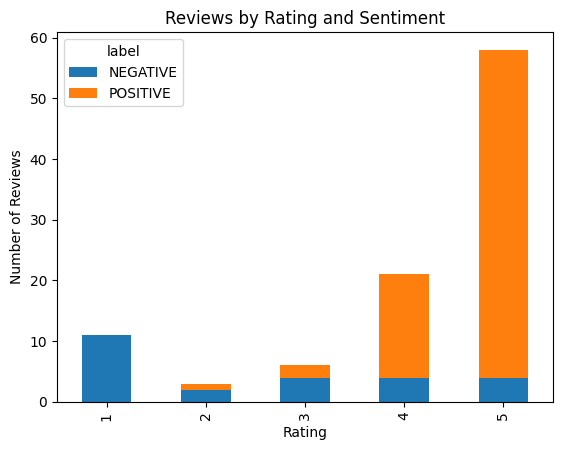

In [6]:
import matplotlib.pyplot as plt

# Group the data by rating and sentiment label
grouped_data = merged_df.groupby(['rating', 'label']).size().unstack(fill_value=0)

# Plot the chart
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews')
ax.set_title('Reviews by Rating and Sentiment')

# Show the chart
plt.show()

# **LiYuan/amazon model used**

In [7]:
classifier_Liy = pipeline(model="LiYuan/amazon-review-sentiment-analysis")

In [8]:
res_Liy = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['title']
        if not pd.isnull(row['review']):
            review_text = str(row['review'])
            text += '.' + review_text
        res_Liy[i] = classifier_Liy(text)[0]

    except Exception as e:
        print(f'Broke for row {i}, error: {e}')

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for row 58, error: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).


In [9]:
#res_Liy
#df
vaders_Liy = pd.DataFrame(res_Liy).T
vaders_Liy = vaders_Liy.reset_index().rename(columns={'index': 'Id'})
#vaders
#vaders_Liy = vaders_Liy.merge(df, how='right')
merged_df_Liy = df.merge(vaders_Liy, left_index=True, right_on='Id', how='left')
merged_df_Liy

,reviewer,rating,title,date,review,Id,label,score
0.0,Melissa,5,Great headphones,2023年10月16日在美國評論,"The fit is great, they don’t move at all durin...",0,5 stars,0.837046
1.0,Jacob Joyner,5,Nice,2023年10月15日在美國評論,Good product that fits nicely and is surprisin...,1,5 stars,0.717173
2.0,VP ED Selector,5,Best headphones compared to in the ear styles,2023年10月15日在美國評論,"Excellent sounded and very user friendly, work...",2,5 stars,0.952661
3.0,JP,4,nice headphones,2023年10月14日在美國評論,nice headphones. would be better if they were ...,3,4 stars,0.68512
4.0,Ollie,5,Love them so far,2023年10月13日在美國評論,I LOVE these headphones. I struggle finding he...,4,5 stars,0.72223
...,...,...,...,...,...,...,...,...
94.0,justin landis,3,Ok for quiet spaces,2023年9月28日在美國評論,"I bought these to use on bicycle rides, howeve...",95,3 stars,0.725884
95.0,Rich,5,Perfect for fitness,2023年9月28日在美國評論,Perfect for my workouts! I wasn’t able to be a...,96,5 stars,0.961973
96.0,Connie Hayes,5,Love these bone conduction headphones!,2023年9月28日在美國評論,I love how easy they are to use!,97,5 stars,0.95703
97.0,Pedro Cortez,4,Decent but could be better,2023年9月28日在美國評論,Bought these for ASMR and Binaural frequency l...,98,4 stars,0.717555


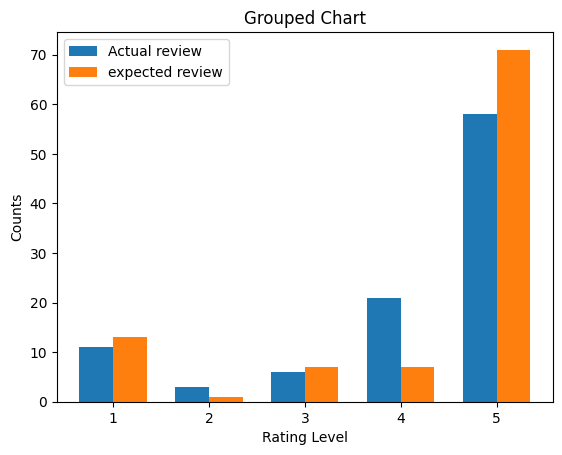

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
tmp=merged_df_Liy

merged_df_Liy = merged_df_Liy.drop(merged_df[merged_df['Id'] == 58].index)
merged_df_Liy['label'] = merged_df_Liy['label'].str.extract(r'(\d+)').astype(int)
#merged_df

A = merged_df_Liy['rating'].tolist()
B = merged_df_Liy['label'].tolist()
rating_level = [1, 2, 3, 4, 5]

# Calculate the counts for each rating level in A and B
counts_A = [A.count(level) for level in rating_level]
counts_B = [B.count(level) for level in rating_level]

# Set the width of each bar
bar_width = 0.35

# Set the x coordinates of the bars
x = np.arange(len(rating_level))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the bars for A and B
rects1 = ax.bar(x - bar_width/2, counts_A, bar_width, label='Actual review')
rects2 = ax.bar(x + bar_width/2, counts_B, bar_width, label='expected review')

# Add labels, title, and legend
ax.set_xlabel('Rating Level')
ax.set_ylabel('Counts')
ax.set_title('Grouped Chart')
ax.set_xticks(x)
ax.set_xticklabels(rating_level)
ax.legend()

# Display the chart
plt.show()

In [11]:
merged_df_Liy[merged_df_Liy['label']<2]


,reviewer,rating,title,date,review,Id,label,score
12.0,Rahsaan Bailey-King,1,Product is not water proof or even water resis...,2023年10月9日在美國評論,Product worked great for about two weeks then ...,12,1,0.720756
13.0,Jack Falter,1,No volume control on headset,2023年10月9日在美國評論,There is no volume control on the headset you ...,13,1,0.410778
20.0,Jamey,1,Done after 4 months,2023年11月8日在美國評論,These headphones started giving me a beeping s...,20,1,0.344454
21.0,Brittany A Hofstra,1,They do NOT last,2023年11月8日在美國評論,I purchased these two months ago and they have...,21,1,0.89183
22.0,Sara Dykstra,3,Not pleased,2023年11月2日在美國評論,Repeatedly kept shutting off by itself; also s...,22,1,0.628496
24.0,Amazon Customer,1,Trash,2023年10月29日在美國評論,Bad sizing and connection,24,1,0.892971
25.0,Sylvia,1,Stopped working,2023年10月26日在美國評論,Worked great h til it doesn’t. Worked yesterda...,25,1,0.850394
27.0,Mama Bear 89,1,Quality is terrible,2023年10月24日在美國評論,"These are not loud enough at all, and are to w...",27,1,0.782249
31.0,Jbear,1,Doesn't work,2023年10月21日在美國評論,Worked 3 times. Now won't turn on. Unfortunate...,31,1,0.884233
56.0,Caitlin Puent,2,Bad battery life,2023年10月2日在美國評論,Worked very well for the first few months then...,56,1,0.754004


In [12]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
res_v = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['title']
        if not pd.isnull(row['review']):
            review_text = str(row['review'])
            text += '.' + review_text
        res_v[i] = sia.polarity_scores(text)

    except Exception as e:
        print(f'Broke for row {i}, error: {e}')
  #  text = row['Text']
  #  myid = row['Id']
  #  res_v[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for row 58, error: 'float' object has no attribute 'encode'


In [14]:
vaders_v = pd.DataFrame(res_v).T
vaders_v = vaders_v.reset_index().rename(columns={'index': 'Id'})
#vaders_v = vaders.merge(df, how='left')
merged_df_v = df.merge(vaders_v, left_index=True, right_on='Id', how='left')
merged_df_v

,reviewer,rating,title,date,review,Id,neg,neu,pos,compound
0.0,Melissa,5,Great headphones,2023年10月16日在美國評論,"The fit is great, they don’t move at all durin...",0,0.000,0.408,0.592,0.9633
1.0,Jacob Joyner,5,Nice,2023年10月15日在美國評論,Good product that fits nicely and is surprisin...,1,0.072,0.752,0.177,0.3782
2.0,VP ED Selector,5,Best headphones compared to in the ear styles,2023年10月15日在美國評論,"Excellent sounded and very user friendly, work...",2,0.000,0.604,0.396,0.9149
3.0,JP,4,nice headphones,2023年10月14日在美國評論,nice headphones. would be better if they were ...,3,0.000,0.568,0.432,0.8860
4.0,Ollie,5,Love them so far,2023年10月13日在美國評論,I LOVE these headphones. I struggle finding he...,4,0.107,0.730,0.163,0.6275
...,...,...,...,...,...,...,...,...,...,...
94.0,justin landis,3,Ok for quiet spaces,2023年9月28日在美國評論,"I bought these to use on bicycle rides, howeve...",95,0.048,0.842,0.110,0.3369
95.0,Rich,5,Perfect for fitness,2023年9月28日在美國評論,Perfect for my workouts! I wasn’t able to be a...,96,0.000,0.767,0.233,0.7707
96.0,Connie Hayes,5,Love these bone conduction headphones!,2023年9月28日在美國評論,I love how easy they are to use!,97,0.000,0.431,0.569,0.9167
97.0,Pedro Cortez,4,Decent but could be better,2023年9月28日在美國評論,Bought these for ASMR and Binaural frequency l...,98,0.000,0.795,0.205,0.9749


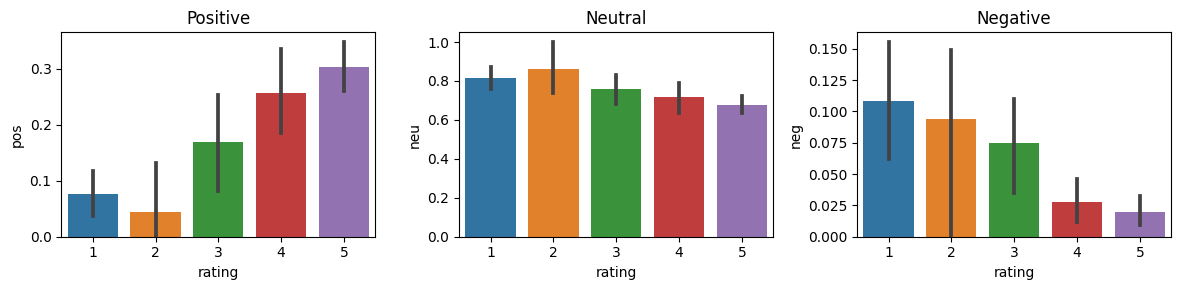

In [15]:
d_vaders_v=vaders_v.drop('Id', axis=1)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=merged_df_v, x='rating', y='pos', ax=axs[0])
sns.barplot(data=merged_df_v, x='rating', y='neu', ax=axs[1])
sns.barplot(data=merged_df_v, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [18]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
res_ro = {}

In [19]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['title']
        if not pd.isnull(row['review']):
            review_text = str(row['review'])
            text += '.' + review_text
        res_ro[i] = polarity_scores_roberta(text)

    except Exception as e:
        print(f'Broke for row {i}, error: {e}')


  0%|          | 0/100 [00:00<?, ?it/s]

Broke for row 58, error: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).


In [20]:
results_df = pd.DataFrame(res_ro).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
merged_results_df = df.merge(results_df, left_index=True, right_on='Id', how='left')

merged_results_df

,reviewer,rating,title,date,review,Id,roberta_neg,roberta_neu,roberta_pos
0.0,Melissa,5,Great headphones,2023年10月16日在美國評論,"The fit is great, they don’t move at all durin...",0,0.004065,0.019554,0.976381
1.0,Jacob Joyner,5,Nice,2023年10月15日在美國評論,Good product that fits nicely and is surprisin...,1,0.150345,0.247054,0.602600
2.0,VP ED Selector,5,Best headphones compared to in the ear styles,2023年10月15日在美國評論,"Excellent sounded and very user friendly, work...",2,0.002088,0.020207,0.977705
3.0,JP,4,nice headphones,2023年10月14日在美國評論,nice headphones. would be better if they were ...,3,0.032950,0.128587,0.838463
4.0,Ollie,5,Love them so far,2023年10月13日在美國評論,I LOVE these headphones. I struggle finding he...,4,0.032352,0.095025,0.872623
...,...,...,...,...,...,...,...,...,...
94.0,justin landis,3,Ok for quiet spaces,2023年9月28日在美國評論,"I bought these to use on bicycle rides, howeve...",95,0.430357,0.463128,0.106515
95.0,Rich,5,Perfect for fitness,2023年9月28日在美國評論,Perfect for my workouts! I wasn’t able to be a...,96,0.008295,0.071481,0.920224
96.0,Connie Hayes,5,Love these bone conduction headphones!,2023年9月28日在美國評論,I love how easy they are to use!,97,0.002137,0.008565,0.989298
97.0,Pedro Cortez,4,Decent but could be better,2023年9月28日在美國評論,Bought these for ASMR and Binaural frequency l...,98,0.007101,0.053116,0.939783


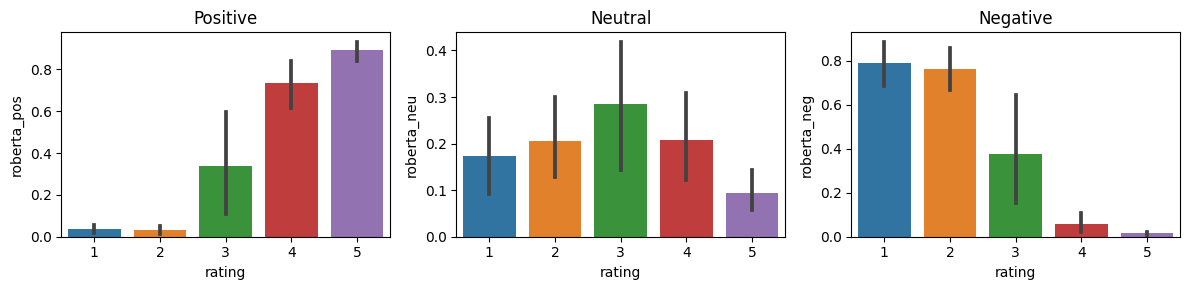

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=merged_results_df, x='rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=merged_results_df, x='rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=merged_results_df, x='rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [26]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords

In [31]:

stop_words = set(stopwords.words('english'))

# Positive and Negative word counters
positive_words = Counter()
negative_words = Counter()

# Iterate over all_data to count words for each label
for i, row in tqdm(merged_df.iterrows(), total=len(df)):
    try:
        text = row['title']
        if not pd.isnull(row['review']):
            review_text = str(row['review'])
            text += '.' + review_text
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

    # Update the word counter based on the label
        if row['label'] == 'POSITIVE':
          positive_words.update(filtered_words)
        elif row['label'] == 'NEGATIVE':
          negative_words.update(filtered_words)


    except Exception as e:
        print(f'Broke for row {i}, error: {e}')


# Get the top 30 most common words for POSITIVE label
top_positive_words = positive_words.most_common(30)

# Get the top 30 most common words for NEGATIVE label
top_negative_words = negative_words.most_common(30)

print("Top 30 words in POSITIVE comments:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

print("Top 30 words in NEGATIVE comments:")
for word, count in top_negative_words:
    print(f"{word}: {count}")

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for row nan, error: expected string or bytes-like object
Top 30 words in POSITIVE comments:
sound: 38
great: 32
good: 25
hear: 18
comfortable: 15
works: 13
quality: 13
easy: 12
love: 12
well: 12
headphones: 11
music: 11
around: 11
use: 10
ear: 9
battery: 9
still: 9
surroundings: 9
head: 9
bone: 9
pair: 8
like: 8
work: 8
far: 8
product: 7
long: 7
listen: 7
life: 7
volume: 7
would: 6
Top 30 words in NEGATIVE comments:
headphones: 12
sound: 8
even: 7
like: 6
phone: 6
de: 6
great: 5
music: 5
battery: 5
ear: 4
neck: 4
two: 4
volume: 4
noise: 4
party: 4
turned: 4
bluetooth: 4
device: 4
wo: 3
bad: 3
use: 3
product: 3
water: 3
worked: 3
one: 3
got: 3
control: 3
hearing: 3
months: 3
working: 3
